# Import

In [1]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import scale
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd

# Data

Read in our univeristy and crime data as a dataframe, then split the outcomes and the features into arrays. ONly using 2 feautures for now, since we can only use quantitative data at the moment.... to be added later.

In [3]:
df = pd.read_csv('cleaned_control.csv', encoding='iso-8859-1')

print(df)

      Unnamed: 0  UNITID                                             INSTNM  \
0              1  100654                           Alabama A & M University   
1              2  100663                University of Alabama at Birmingham   
2              3  100690                                 Amridge University   
3              4  100706                University of Alabama in Huntsville   
4              5  100724                           Alabama State University   
5              6  100751                          The University of Alabama   
6              7  100760                  Central Alabama Community College   
7              8  100812                            Athens State University   
8              9  100830                    Auburn University at Montgomery   
9             10  100858                                  Auburn University   
10            11  100937                        Birmingham Southern College   
11            12  101028             Chattahoochee V

In [21]:
crime = df['crime_rate'] #outcomes
crime_rate = np.array(crime)
print(crime_rate)

[ 3.56272267  1.60444967  0.         ...,  0.          0.          0.        ]


In [37]:
feature = df.drop('crime_rate',axis=1) #variables
#features = feature.to_dict()['fin_indep']
features = np.array(feature[['fin_indep','student_pop','Public','Private non-profit','Private for-profit', 'firstgen_pct','fam_income']])
print(features)

[[  1.29593046e-01   5.33300000e+03   1.00000000e+00 ...,   0.00000000e+00
    3.94033838e-01   2.15953319e+04]
 [  3.11615321e-01   1.86980000e+04   1.00000000e+00 ...,   0.00000000e+00
    3.57158862e-01   3.44914012e+04]
 [  8.94259819e-01   6.25000000e+02   0.00000000e+00 ...,   0.00000000e+00
    6.02409639e-01   1.51917828e+04]
 ..., 
 [  7.74729842e-01   7.50000000e+01   0.00000000e+00 ...,   1.00000000e+00
    5.45243620e-01   1.24241034e+04]
 [  5.03105590e-01   6.70000000e+01   0.00000000e+00 ...,   1.00000000e+00
    7.04000000e-01   1.76472906e+04]
 [  6.36593060e-01   2.43100000e+03   1.00000000e+00 ...,   0.00000000e+00
    5.42372881e-01   1.54638898e+04]]


# Train-Test split

Split 80-20 train and test data, to use for model.

In [23]:
#split train and test data
feat_train, feat_test, crime_train, crime_test = train_test_split(features, crime_rate, test_size = 0.2, random_state=11)

In [24]:
#features set
print(feat_train)
print(feat_test.shape)
#outcome set
print(crime_train.shape)
print(crime_test.shape)

[[  6.11242604e-01   5.76000000e+02   0.00000000e+00 ...,   1.00000000e+00
    6.13023256e-01   1.37088263e+04]
 [  7.66233766e-01   2.20100000e+03   1.00000000e+00 ...,   0.00000000e+00
    4.97227357e-01   1.40964664e+04]
 [  6.80203046e-01   8.59000000e+02   0.00000000e+00 ...,   0.00000000e+00
    3.59550562e-01   2.88340367e+04]
 ..., 
 [  8.44897959e-01   7.00000000e+01   0.00000000e+00 ...,   1.00000000e+00
    6.43979058e-01   1.87216946e+04]
 [  6.68478261e-01   1.31000000e+02   0.00000000e+00 ...,   1.00000000e+00
    5.13888889e-01   1.89719820e+04]
 [  6.23847572e-01   5.47500000e+03   1.00000000e+00 ...,   0.00000000e+00
    5.28643945e-01   1.52370034e+04]]
(1159, 7)
(4632,)
(1159,)


# Scaling/Standardize

In [25]:
mins = np.min(feat_train, axis = 0)
maxes = np.max(feat_train, axis = 0)
diff = maxes - mins

In [26]:
diff

array([  9.61869136e-01,   1.95058000e+05,   1.00000000e+00,
         1.00000000e+00,   1.00000000e+00,   9.09209337e-01,
         1.22247223e+05])

In [27]:
feat_train_stand = (feat_train - mins) / diff
feat_test_stand = (feat_test - mins) / diff

In [28]:
minCrime = np.min(crime_train)
maxCrime = np.max(crime_train)
diffCrime = maxCrime - minCrime

In [29]:
crime_train_stand = (crime_train - minCrime) / diffCrime
crime_test_stand = (crime_test - minCrime) / diffCrime

# K-Fold Cross Validation


In [40]:
kValues = [10,20,30,40,50,70, 100, 200, 3000, 4000]

In [41]:
folds = KFold(len(feat_train), n_folds = 10, shuffle = True)
print(folds)

sklearn.cross_validation.KFold(n=4632, n_folds=10, shuffle=True, random_state=None)


In [42]:
for train_index, val_index in folds:
        print(train_index)

[   0    1    2 ..., 4628 4629 4631]
[   0    1    2 ..., 4627 4628 4630]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]
[   1    2    3 ..., 4629 4630 4631]
[   0    2    3 ..., 4629 4630 4631]
[   0    1    2 ..., 4629 4630 4631]


In [ ]:
scores = {}
for k in kValues:
    currentScores = []
    for train_index, val_index in folds:
        current_train_feat = feat_train_stand[train_index]
        current_val_feat = feat_train_stand[val_index]
        current_train_crime, current_val_crime = crime_train[train_index], crime_train[val_index]
        neigh = KNeighborsRegressor(n_neighbors = k)
        print(neigh)
        neigh.fit(current_train_feat, current_train_crime)
        guesses = neigh.predict(current_val_feat)
        rmse = np.sqrt(mean_squared_error(guesses, current_val_crime))
        currentScores.append(rmse)
    scores[k] = currentScores

# Plotting Error

In [34]:
keys = sorted(scores.keys())
means = []
stdevs = []
for each in keys:
    current = scores[each]
    means.append(np.mean(current)) 
    stdevs.append(np.std(current))

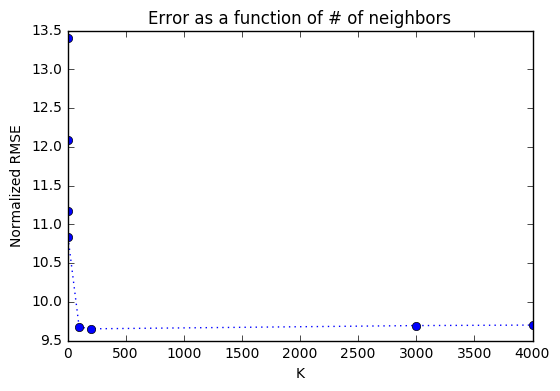

In [35]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')

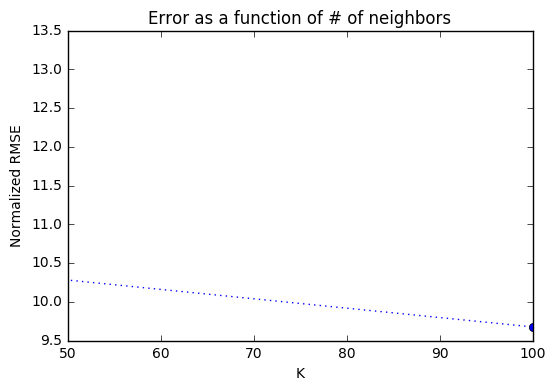

In [39]:
figure = plt.figure()
plt.plot(keys, means, 'bo:')
plt.xlabel('K')
plt.ylabel('Normalized RMSE')
plt.title('Error as a function of # of neighbors')
plt.xlim([50,100]);

From this, somewhere around 100-150 would be our ideal K neighbors, however this is probably a very inaccurate model since we only consider 2 features. 